In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly as pty

In [2]:
df = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\New Datasets\US Pollution Dataset\data.csv")
df.head()

Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...            SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...    Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...    Parts per billion  3.000000   
2  2000-01-01  Parts per billion  ...    Parts per billion  2.975000   
3  2000-01-01  Parts per billion  ...    Parts per billion  2.975000   
4  2000-01-02  Parts per billion  ...    Parts per billion  1.958333   

   SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units   CO Mean  \
0                9.0                21    13.0  Parts per million  1.145833   
1                9.0                21    13.0  Parts per million  0.878947   
2                6.6                23     NaN  Parts per million  1.145833   
3                6.6                23     NaN  Parts per million  0.878947   
4                3.0                22     4.0  Parts per million  0.850000   

   CO 1st Max Value  CO 1st Max Hour CO AQI  
0               4.2               21    NaN  
1               2.2               23   25.0  
2               4.2               21    NaN  
3               2.2               23   25.0  
4               1.6               23    NaN  

[5 rows x 29 columns]

In [3]:
df['Site Num'].nunique()

110

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
Unnamed: 0           int64
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(10), object(9)
memory usage: 386.5+ MB


In [5]:
df.drop(columns=['Unnamed: 0','State Code','County Code','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1,inplace=True)
df.head()

Site Num    State    County     City  Date Local   NO2 Mean  \
0      3002  Arizona  Maricopa  Phoenix  2000-01-01  19.041667   
1      3002  Arizona  Maricopa  Phoenix  2000-01-01  19.041667   
2      3002  Arizona  Maricopa  Phoenix  2000-01-01  19.041667   
3      3002  Arizona  Maricopa  Phoenix  2000-01-01  19.041667   
4      3002  Arizona  Maricopa  Phoenix  2000-01-02  22.958333   

   NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI   O3 Mean   ...    \
0               49.0                19       46  0.022500   ...     
1               49.0                19       46  0.022500   ...     
2               49.0                19       46  0.022500   ...     
3               49.0                19       46  0.022500   ...     
4               36.0                19       34  0.013375   ...     

   O3 1st Max Hour  O3 AQI  SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  \
0               10      34  3.000000                9.0                21   
1               10      34  3.000000                9.0                21   
2               10      34  2.975000                6.6                23   
3               10      34  2.975000                6.6                23   
4               10      27  1.958333                3.0                22   

   SO2 AQI   CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  
0     13.0  1.145833               4.2               21     NaN  
1     13.0  0.878947               2.2               23    25.0  
2      NaN  1.145833               4.2               21     NaN  
3      NaN  0.878947               2.2               23    25.0  
4      4.0  0.850000               1.6               23     NaN  

[5 rows x 21 columns]

In [6]:
df.isnull().sum()

Site Num                  0
State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [7]:
print(df['Date Local'].nunique())
x = df[df['SO2 AQI'] >= 0]
print(x['Date Local'].nunique())
x = df[df['CO AQI'] >= 0]
print(x['Date Local'].nunique())

5996
5996
5996


In [8]:
import warnings
warnings.filterwarnings("ignore")
lx = ['State','County','City','Date Local','NO2 Mean','NO2 1st Max Value','NO2 1st Max Hour','NO2 AQI']
df_no2 = df[lx]
df_no2['Date Local'] = pd.to_datetime(df_no2['Date Local'])
#---------------------------------------------------------------------------------------------------------------------------
lx = ['State','County','City','Date Local','O3 Mean','O3 1st Max Value','O3 1st Max Hour','O3 AQI']
df_o3 = df[lx]
df_o3['Date Local'] = pd.to_datetime(df_o3['Date Local'])
#---------------------------------------------------------------------------------------------------------------------------
lx = ['State','County','City','Date Local','SO2 Mean','SO2 1st Max Value','SO2 1st Max Hour','SO2 AQI']
df_so2 = df[lx]
df_so2['Date Local'] = pd.to_datetime(df_so2['Date Local'])
df_so2.dropna(axis=0,inplace=True)
#---------------------------------------------------------------------------------------------------------------------------
lx = ['State','County','City','Date Local','CO Mean','CO 1st Max Value','CO 1st Max Hour','CO AQI']
df_co = df[lx]
df_co['Date Local'] = pd.to_datetime(df_co['Date Local'])
df_co.dropna(axis=0,inplace=True)

# For AQI of NO2, O3, SO2, CO

Text(0.5,0,'')

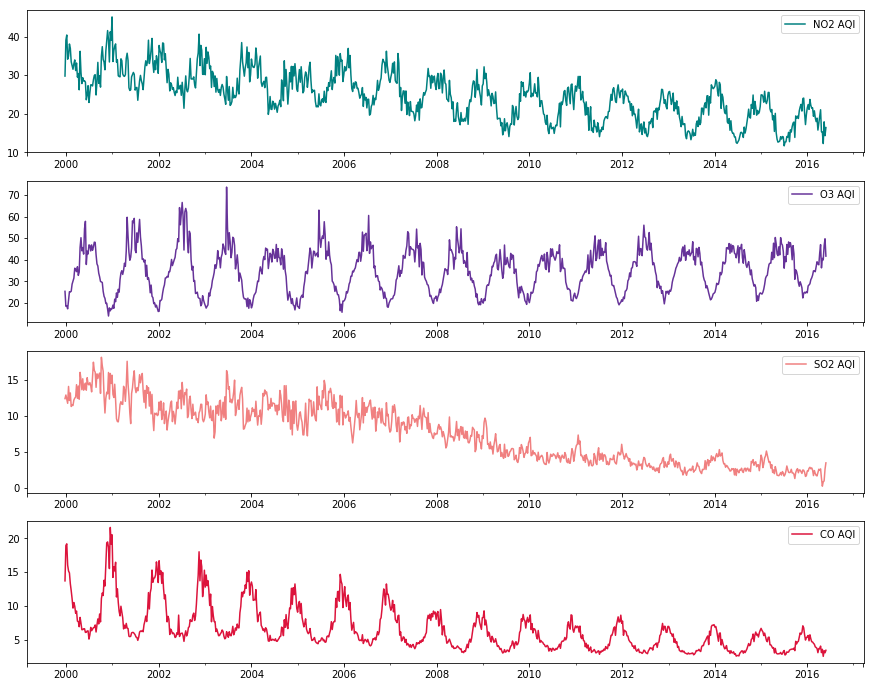

In [9]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,1, figsize=(15,12))

l = ['Date Local','NO2 AQI']
df_no2_1 = df_no2[l]
df_no2_1.set_index('Date Local',inplace=True)
df_no2_1 = df_no2_1.resample('W', how={'NO2 AQI':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_no2_1.plot(kind='line',ax=axes[0],color='teal')
axes[0].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','O3 AQI']
df_o3_1 = df_o3[l]
df_o3_1.set_index('Date Local',inplace=True)
df_o3_1 = df_o3_1.resample('W', how={'O3 AQI':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_o3_1.plot(kind='line',ax=axes[1],color='rebeccapurple')
axes[1].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','SO2 AQI']
df_so2_1 = df_so2[l]
df_so2_1.set_index('Date Local',inplace=True)
df_so2_1 = df_so2_1.resample('W', how={'SO2 AQI':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_so2_1.plot(kind='line',ax=axes[2],color='lightcoral')
axes[2].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','CO AQI']
df_co_1 = df_co[l]
df_co_1.set_index('Date Local',inplace=True)
df_co_1 = df_co_1.resample('W', how={'CO AQI':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_co_1.plot(kind='line',ax=axes[3],color='crimson')
axes[3].set_xlabel("")

# Time Series Decomposition for AQI's

Text(0.5,0,'')

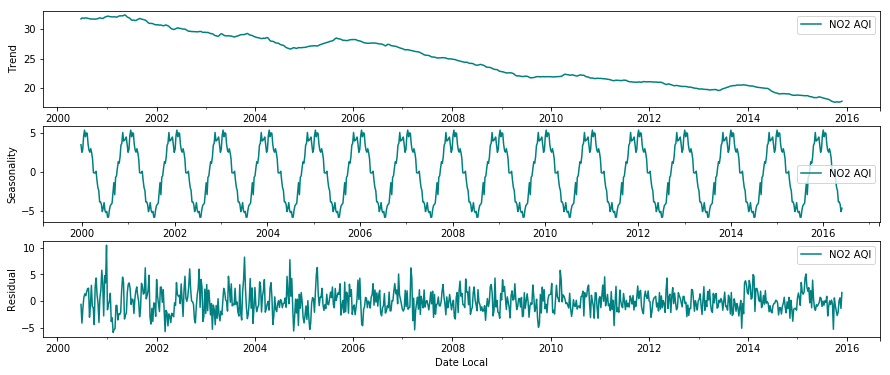

In [10]:
# Time Series Decomposition for NO2 AQI
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_no2_1,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='teal')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='teal')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='teal')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

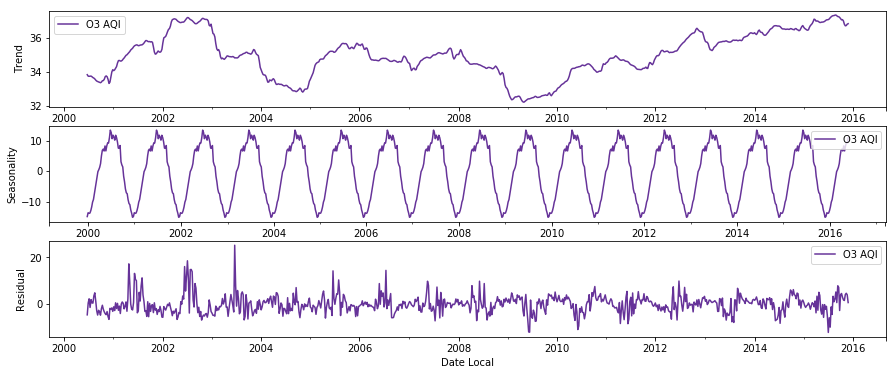

In [11]:
# Time Series Decomposition for O3 AQI
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_o3_1,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='rebeccapurple')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='rebeccapurple')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='rebeccapurple')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

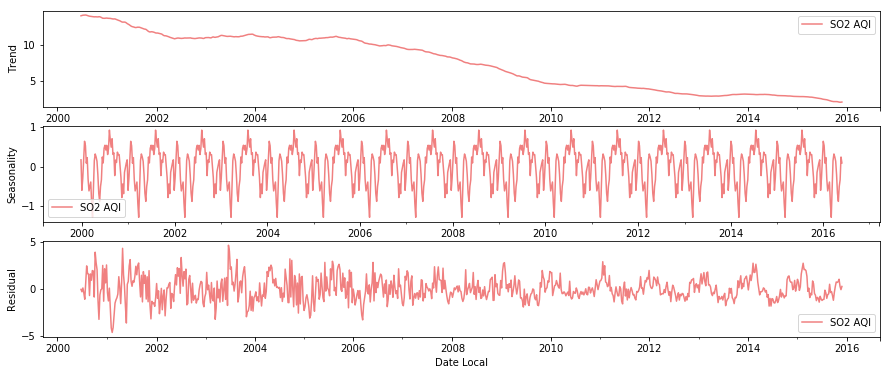

In [12]:
# Time Series Decomposition for SO2 AQI
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_so2_1,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='lightcoral')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='lightcoral')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='lightcoral')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

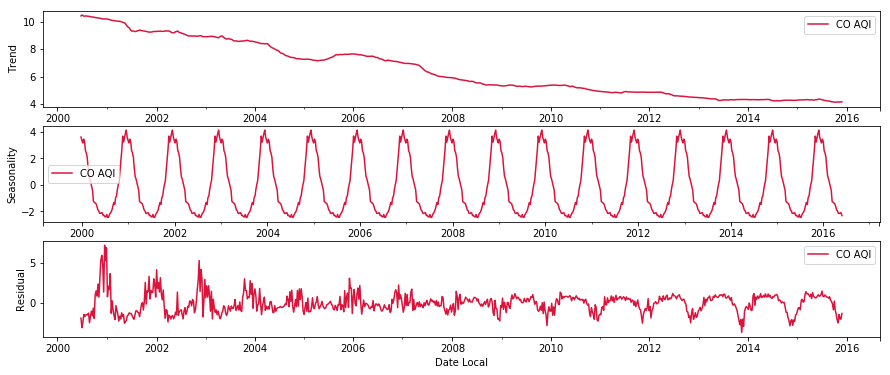

In [13]:
# Time Series Decomposition for CO AQI
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_co_1,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='crimson')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='crimson')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='crimson')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

# For Means of NO2, O3, SO2, CO

Text(0.5,0,'')

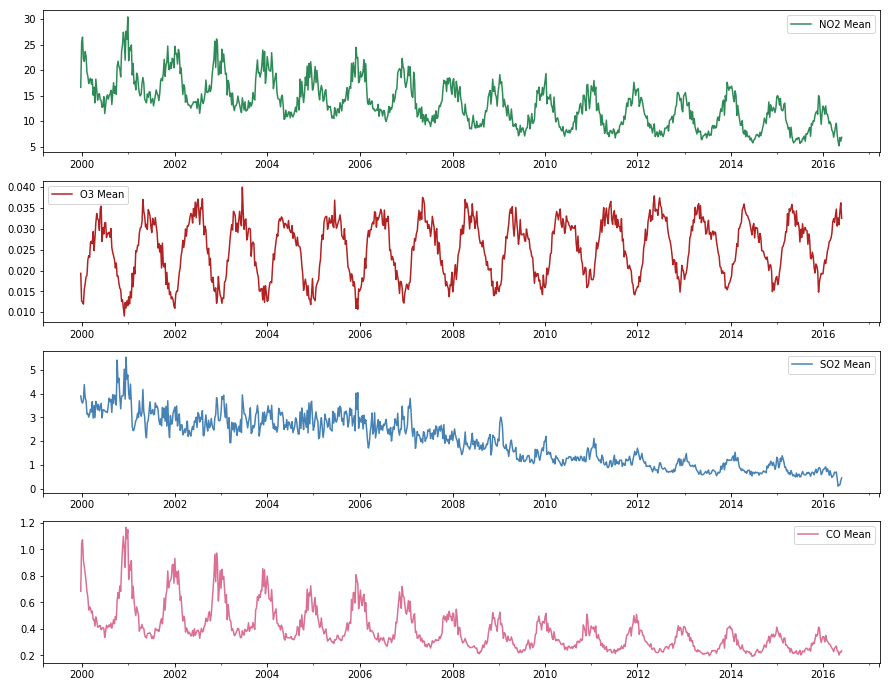

In [14]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,1, figsize=(15,12))

l = ['Date Local','NO2 Mean']
df_no2_2 = df_no2[l]
df_no2_2.set_index('Date Local',inplace=True)
df_no2_2 = df_no2_2.resample('W', how={'NO2 Mean':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_no2_2.plot(kind='line',ax=axes[0],color='seagreen')
axes[0].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','O3 Mean']
df_o3_2 = df_o3[l]
df_o3_2.set_index('Date Local',inplace=True)
df_o3_2 = df_o3_2.resample('W', how={'O3 Mean':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_o3_2.plot(kind='line',ax=axes[1],color='firebrick')
axes[1].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','SO2 Mean']
df_so2_2 = df_so2[l]
df_so2_2.set_index('Date Local',inplace=True)
df_so2_2 = df_so2_2.resample('W', how={'SO2 Mean':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_so2_2.plot(kind='line',ax=axes[2],color='steelblue')
axes[2].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','CO Mean']
df_co_2 = df_co[l]
df_co_2.set_index('Date Local',inplace=True)
df_co_2 = df_co_2.resample('W', how={'CO Mean':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_co_2.plot(kind='line',ax=axes[3],color='palevioletred')
axes[3].set_xlabel("")

# Time Series Decomposition for Mean's

Text(0.5,0,'')

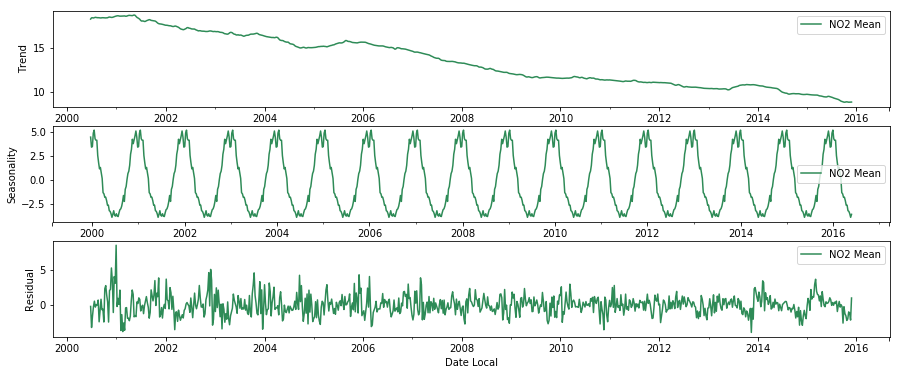

In [15]:
# Time Series Decomposition for NO2 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_no2_2,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='seagreen')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='seagreen')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='seagreen')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

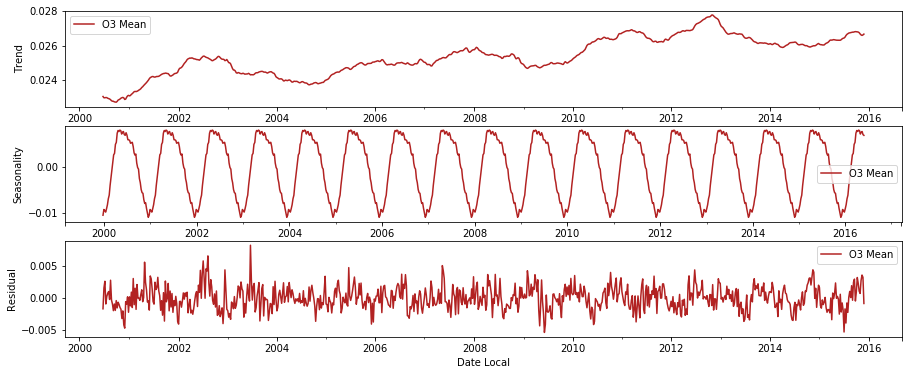

In [16]:
# Time Series Decomposition for O3 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_o3_2,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='firebrick')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='firebrick')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='firebrick')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

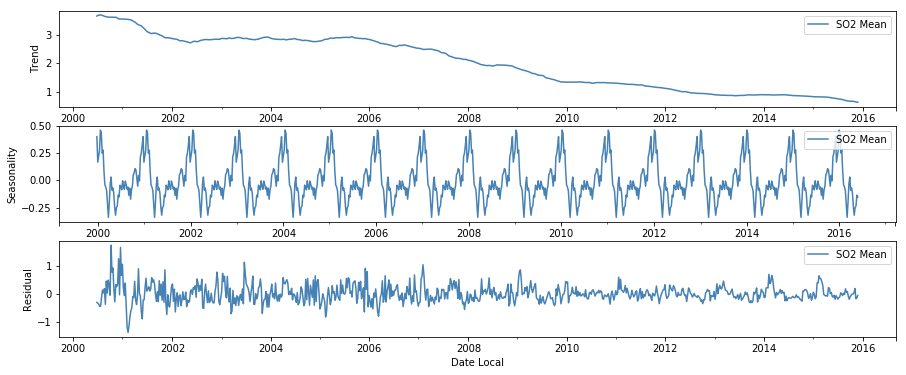

In [17]:
# Time Series Decomposition for SO2 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_so2_2,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='steelblue')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='steelblue')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='steelblue')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

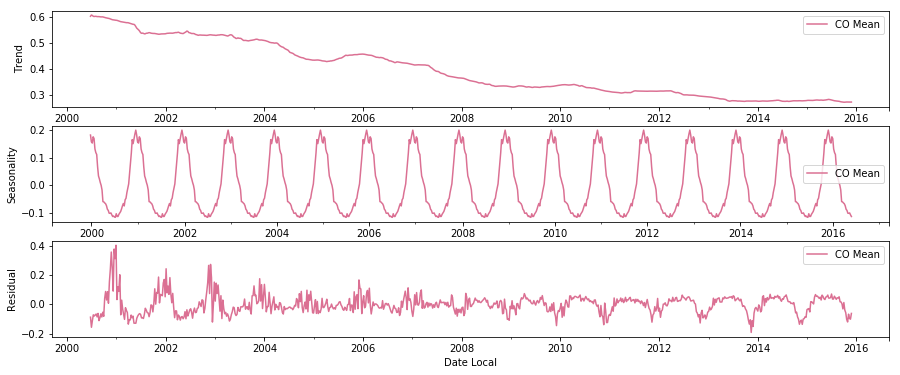

In [18]:
# Time Series Decomposition for CO Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_co_2,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='palevioletred')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='palevioletred')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='palevioletred')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

# For 1st Max Value of NO2, O3, SO2, CO

Text(0.5,0,'')

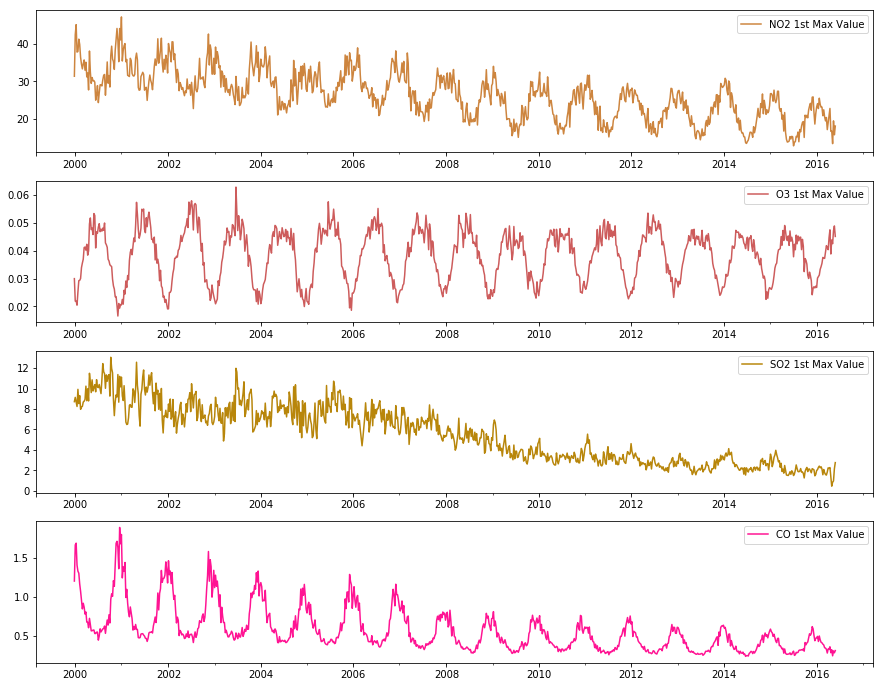

In [19]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,1, figsize=(15,12))

l = ['Date Local','NO2 1st Max Value']
df_no2_3 = df_no2[l]
df_no2_3.set_index('Date Local',inplace=True)
df_no2_3 = df_no2_3.resample('W', how={'NO2 1st Max Value':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_no2_3.plot(kind='line',ax=axes[0],color='peru')
axes[0].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','O3 1st Max Value']
df_o3_3 = df_o3[l]
df_o3_3.set_index('Date Local',inplace=True)
df_o3_3 = df_o3_3.resample('W', how={'O3 1st Max Value':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_o3_3.plot(kind='line',ax=axes[1],color='indianred')
axes[1].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','SO2 1st Max Value']
df_so2_3 = df_so2[l]
df_so2_3.set_index('Date Local',inplace=True)
df_so2_3 = df_so2_3.resample('W', how={'SO2 1st Max Value':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_so2_3.plot(kind='line',ax=axes[2],color='darkgoldenrod')
axes[2].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','CO 1st Max Value']
df_co_3 = df_co[l]
df_co_3.set_index('Date Local',inplace=True)
df_co_3 = df_co_3.resample('W', how={'CO 1st Max Value':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_co_3.plot(kind='line',ax=axes[3],color='deeppink')
axes[3].set_xlabel("")

# Time Series Decomposition for NO2, O3, SO2, CO

Text(0.5,0,'')

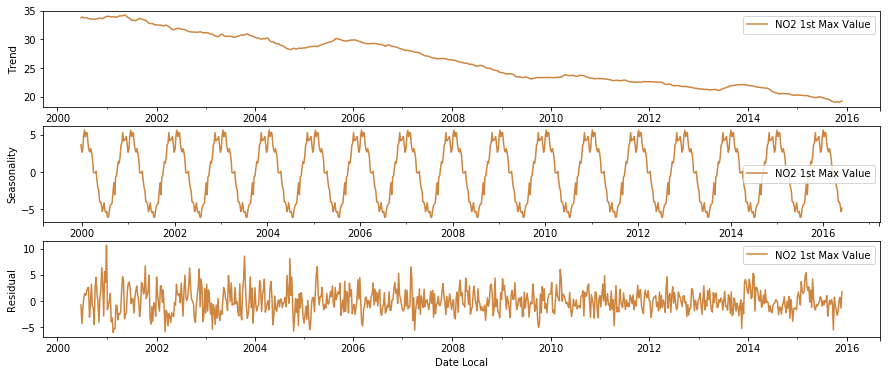

In [20]:
# Time Series Decomposition for NO2 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_no2_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='peru')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='peru')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='peru')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

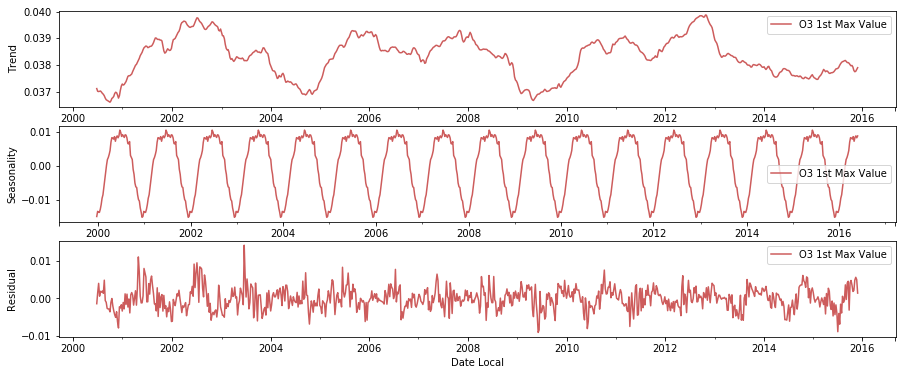

In [21]:
# Time Series Decomposition for O3 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_o3_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='indianred')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='indianred')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='indianred')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

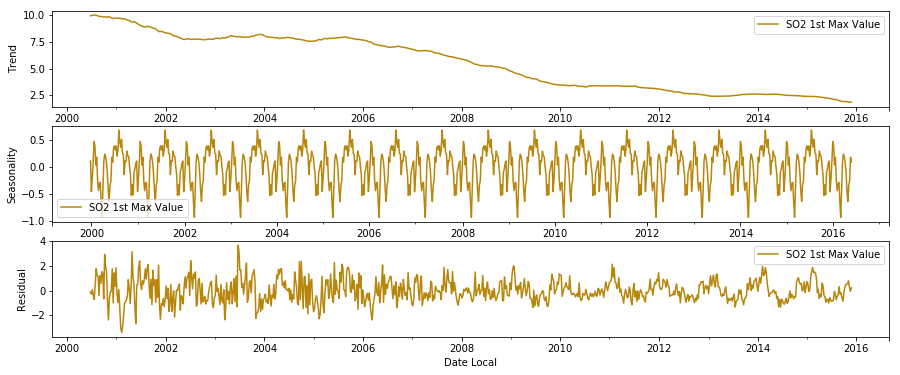

In [22]:
# Time Series Decomposition for SO2 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_so2_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='darkgoldenrod')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='darkgoldenrod')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='darkgoldenrod')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

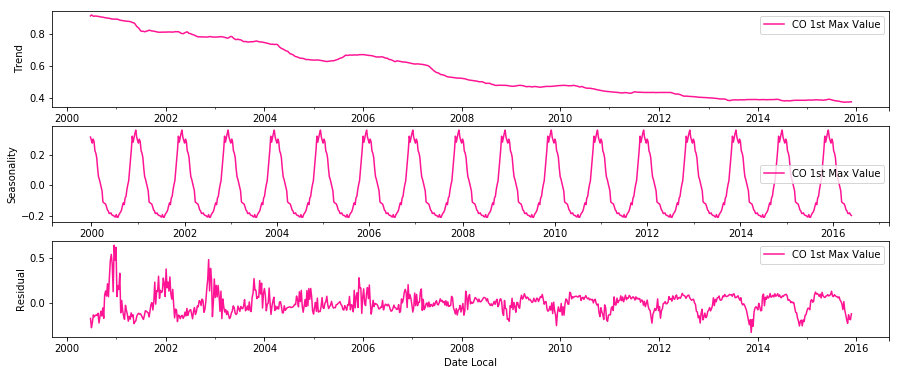

In [23]:
# Time Series Decomposition for CO Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_co_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='deeppink')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='deeppink')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='deeppink')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

# For 1st Max Hour of NO2, O3, SO2, CO

Text(0.5,0,'')

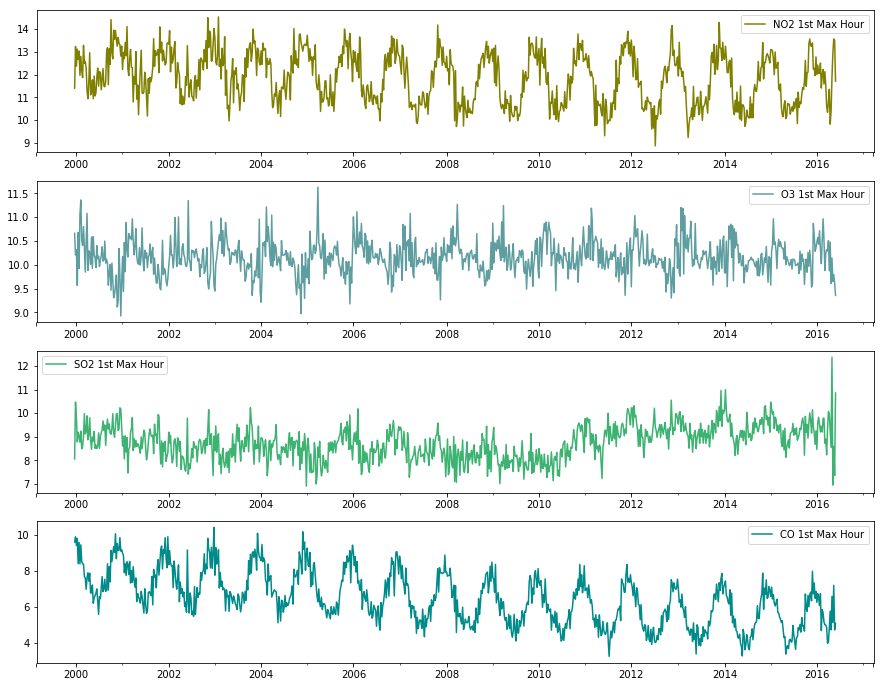

In [24]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,1, figsize=(15,12))

l = ['Date Local','NO2 1st Max Hour']
df_no2_4 = df_no2[l]
df_no2_4.set_index('Date Local',inplace=True)
df_no2_4 = df_no2_4.resample('W', how={'NO2 1st Max Hour':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_no2_4.plot(kind='line',ax=axes[0],color='olive')
axes[0].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','O3 1st Max Hour']
df_o3_4 = df_o3[l]
df_o3_4.set_index('Date Local',inplace=True)
df_o3_4 = df_o3_4.resample('W', how={'O3 1st Max Hour':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_o3_4.plot(kind='line',ax=axes[1],color='cadetblue')
axes[1].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','SO2 1st Max Hour']
df_so2_4 = df_so2[l]
df_so2_4.set_index('Date Local',inplace=True)
df_so2_4 = df_so2_4.resample('W', how={'SO2 1st Max Hour':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_so2_4.plot(kind='line',ax=axes[2],color='mediumseagreen')
axes[2].set_xlabel("")
#---------------------------------------------------------------------------------------------------------------------------
l = ['Date Local','CO 1st Max Hour']
df_co_4 = df_co[l]
df_co_4.set_index('Date Local',inplace=True)
df_co_4 = df_co_4.resample('W', how={'CO 1st Max Hour':'mean'}, loffset=pd.offsets.timedelta(days=-6))
df_co_4.plot(kind='line',ax=axes[3],color='darkcyan')
axes[3].set_xlabel("")

# Time Series Decomposition for NO2, O3, SO2, CO

Text(0.5,0,'')

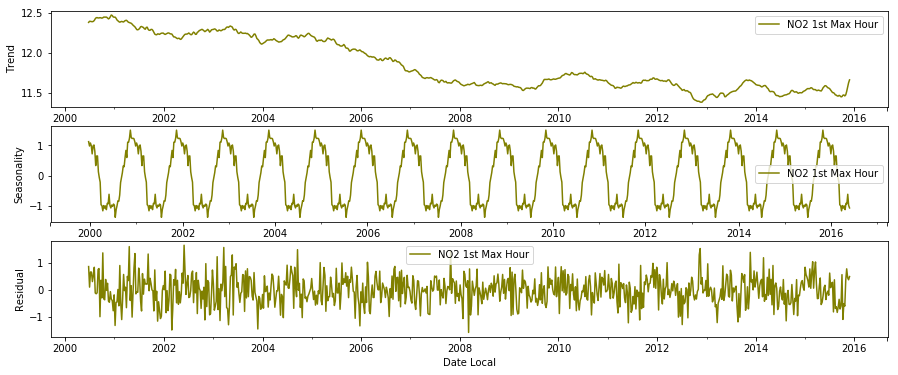

In [25]:
# Time Series Decomposition for NO2 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_no2_4,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='olive')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='olive')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='olive')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

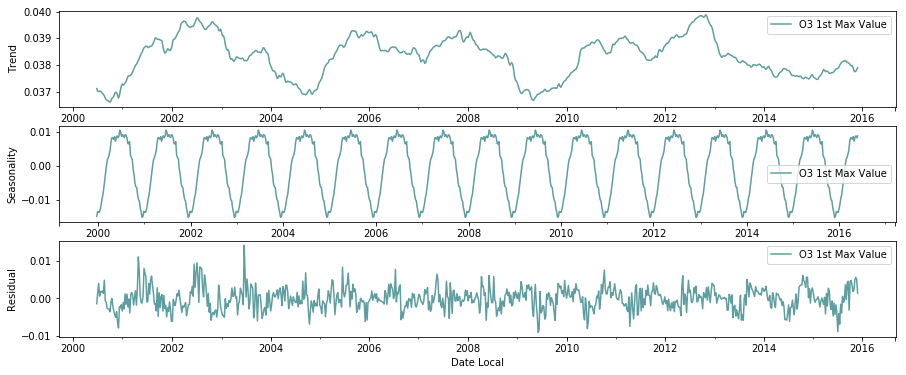

In [26]:
# Time Series Decomposition for O3 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_o3_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='cadetblue')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='cadetblue')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='cadetblue')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

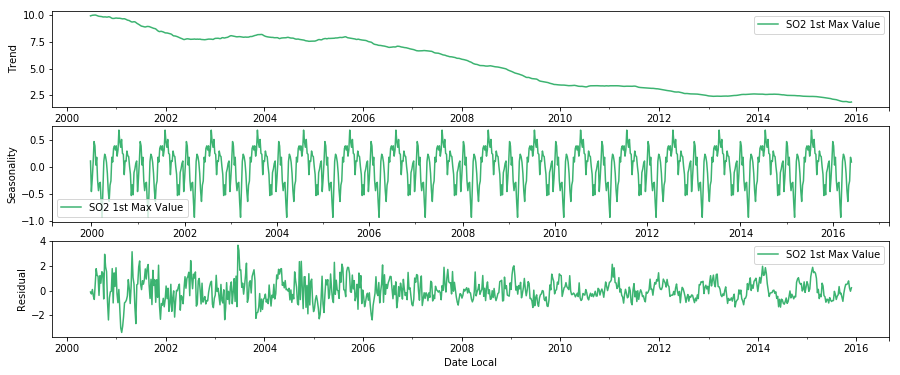

In [27]:
# Time Series Decomposition for SO2 Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_so2_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='mediumseagreen')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='mediumseagreen')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='mediumseagreen')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

Text(0.5,0,'')

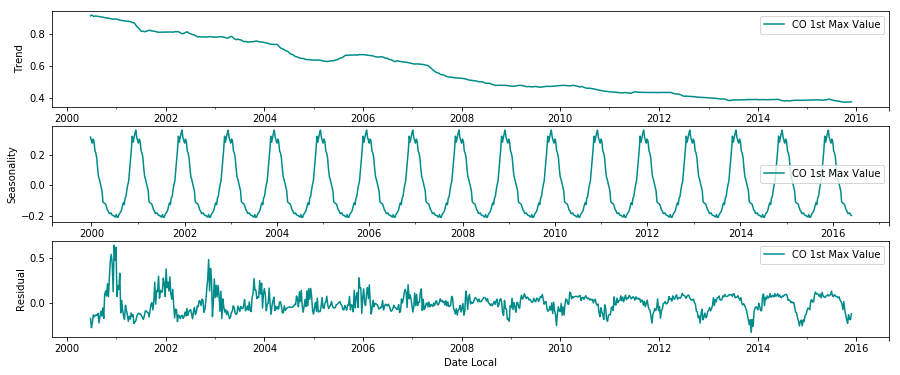

In [28]:
# Time Series Decomposition for CO Mean
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_co_3,model='additive')
# resplot = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,6))
res.trend.plot(ax=ax1,color='darkcyan')
ax1.set_ylabel("Trend")
ax1.set_xlabel("")
res.seasonal.plot(ax=ax2,color='darkcyan')
ax2.set_ylabel("Seasonality")
ax1.set_xlabel("")
res.resid.plot(ax=ax3,color='darkcyan')
ax3.set_ylabel("Residual")
ax1.set_xlabel("")

In [29]:
from shapely.geometry import Point,Polygon
shape_file = gpd.read_file(r"Desktop\US_States\states.shp")
shape_file.head()

STATE_NAME  DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
0        Hawaii        1         15             Pacific         HI   
1    Washington        2         53             Pacific         WA   
2       Montana        3         30            Mountain         MT   
3         Maine        4         23         New England         ME   
4  North Dakota        5         38  West North Central         ND   

                                            geometry  
0  (POLYGON ((-160.0738033454681 22.0041773479577...  
1  (POLYGON ((-122.4020153103835 48.2252163723779...  
2  POLYGON ((-111.4754253002074 44.70216236909688...  
3  (POLYGON ((-69.77727626137293 44.0741483685119...  
4  POLYGON ((-98.73043728833767 45.93827137024809...

In [30]:
shape_file.drop(columns=['DRAWSEQ','STATE_FIPS','SUB_REGION','STATE_ABBR'],axis=1,inplace=True)

In [31]:
df['State'].replace({'Country Of Mexico':'New Mexico','District Of Columbia':'District of Columbia'},inplace=True)
df['State'].nunique()

46

Text(0.5,1,'US State-Wise NO2 AQI Analysis')

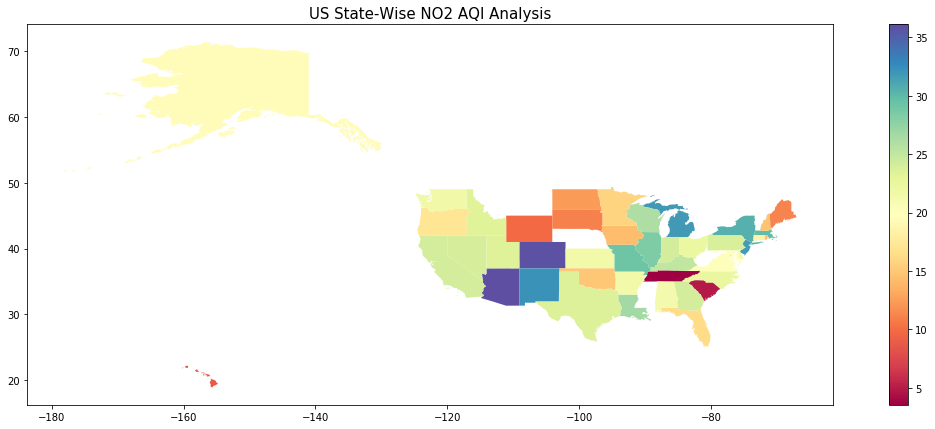

In [32]:
# For NO2 AQI
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[df['State']==i]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,7))
plt.title("US State-Wise NO2 AQI Analysis",fontsize=15)

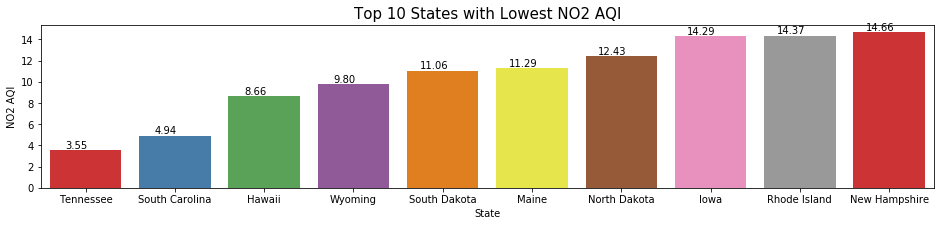

In [33]:
import operator
lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
plt.figure(figsize=(16,3))
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1")
plt.title("Top 10 States with Lowest NO2 AQI",fontsize=15)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

Text(0.5,1,'US State-Wise O3 AQI Analysis')

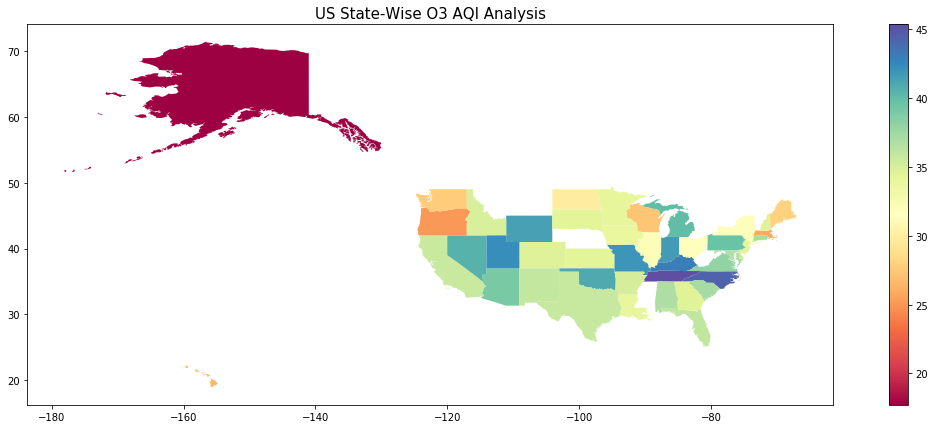

In [34]:
# For O3 AQI
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[df['State']==i]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_o3_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_o3_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,7))
plt.title("US State-Wise O3 AQI Analysis",fontsize=15)

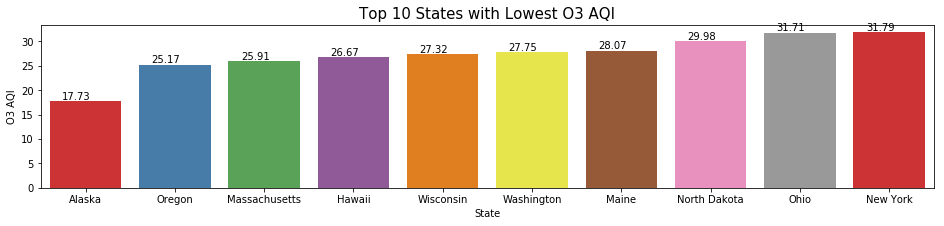

In [35]:
import operator
lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
plt.figure(figsize=(16,3))
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1")
plt.title("Top 10 States with Lowest O3 AQI",fontsize=15)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

Text(0.5,1,'US State-Wise SO2 AQI Analysis')

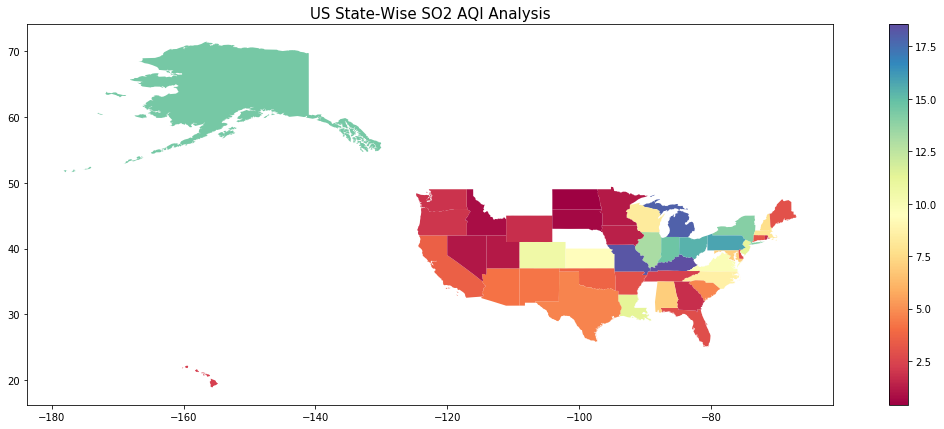

In [36]:
# For SO2 AQI
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[df['State']==i]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_so2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_so2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,7))
plt.title("US State-Wise SO2 AQI Analysis",fontsize=15)

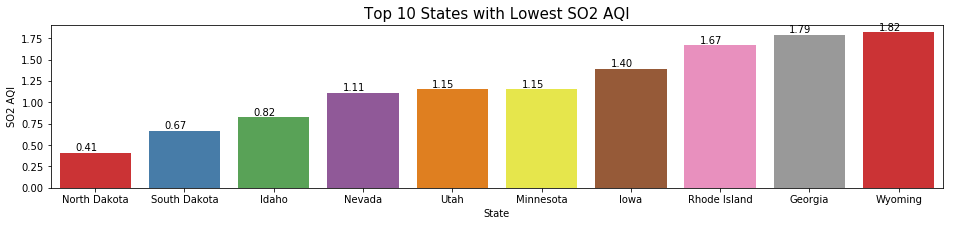

In [37]:
import operator
lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
plt.figure(figsize=(16,3))
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1")
plt.title("Top 10 States with Lowest SO2 AQI",fontsize=15)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

Text(0.5,1,'US State-Wise CO AQI Analysis')

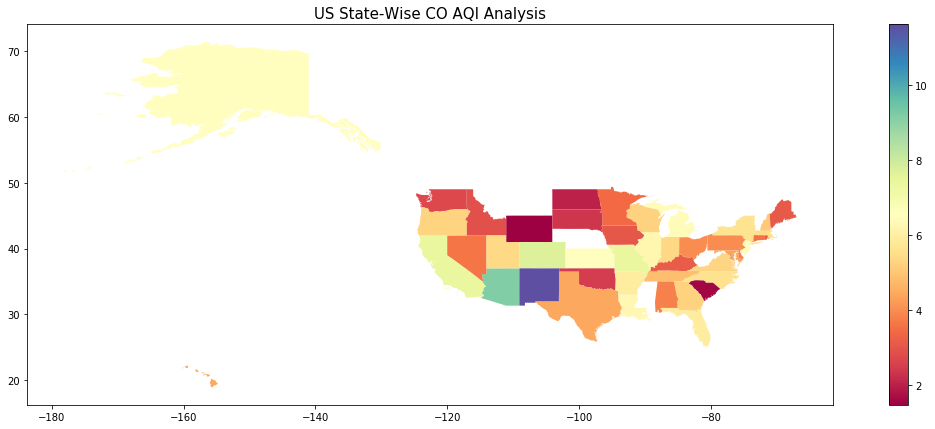

In [38]:
# For CO AQI
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[df['State']==i]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_co_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_co_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,7))
plt.title("US State-Wise CO AQI Analysis",fontsize=15)

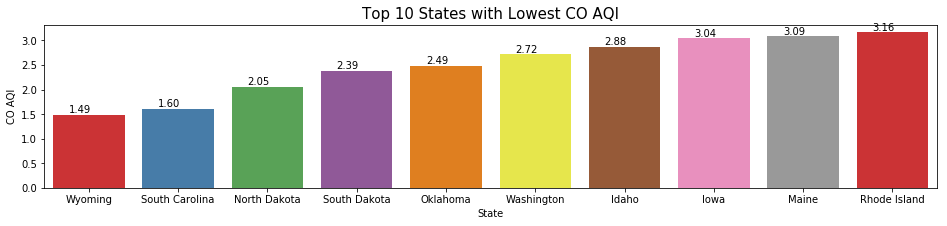

In [39]:
import operator
lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
plt.figure(figsize=(16,3))
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1")
plt.title("Top 10 States with Lowest CO AQI",fontsize=15)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [40]:
df['Date Local'] = pd.to_datetime(df['Date Local'])
df['Year'] = pd.DatetimeIndex(df['Date Local']).year

In [41]:
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

# For NO2

Text(0.5,1,'2015')

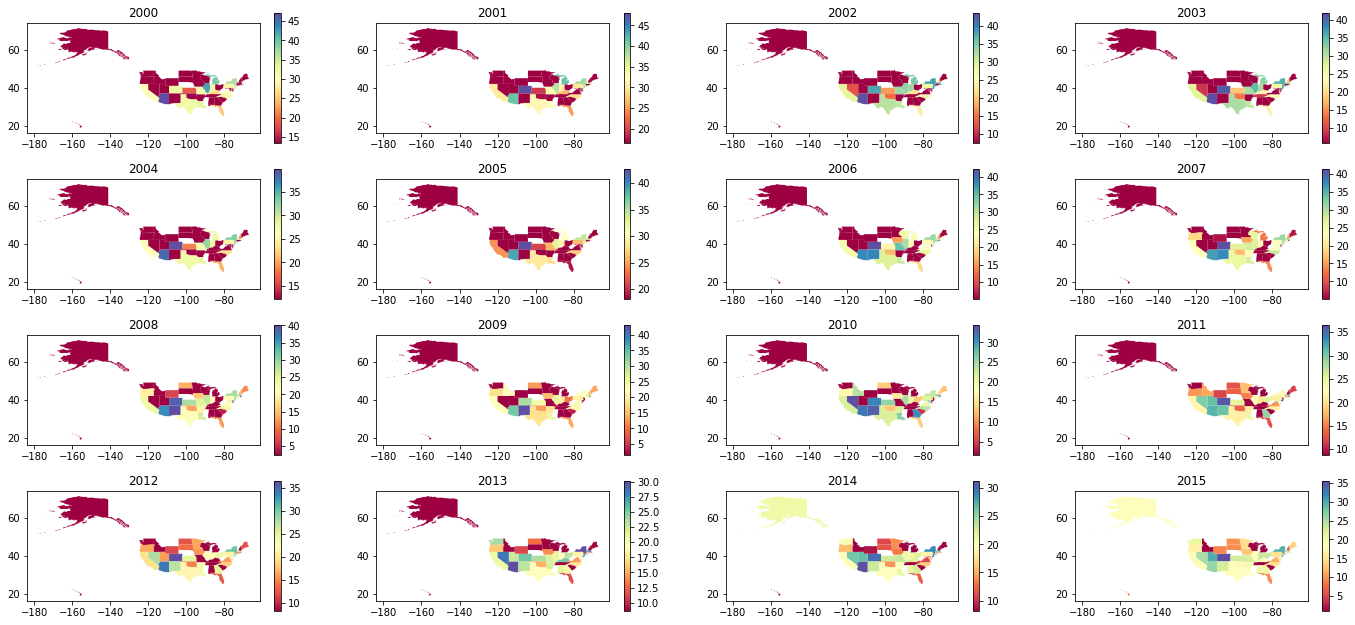

In [42]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,4, figsize=(24,11))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,0])
axes[0,0].set_title("2000")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,1])
axes[0,1].set_title("2001")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,2])
axes[0,2].set_title("2002")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,3])
axes[0,3].set_title("2003")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,0])
axes[1,0].set_title("2004")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,1])
axes[1,1].set_title("2005")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,2])
axes[1,2].set_title("2006")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,3])
axes[1,3].set_title("2007")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,0])
axes[2,0].set_title("2008")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,1])
axes[2,1].set_title("2009")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,2])
axes[2,2].set_title("2010")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,3])
axes[2,3].set_title("2011")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,0])
axes[3,0].set_title("2012")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,1])
axes[3,1].set_title("2013")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,2])
axes[3,2].set_title("2014")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','NO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['NO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,3])
axes[3,3].set_title("2015")

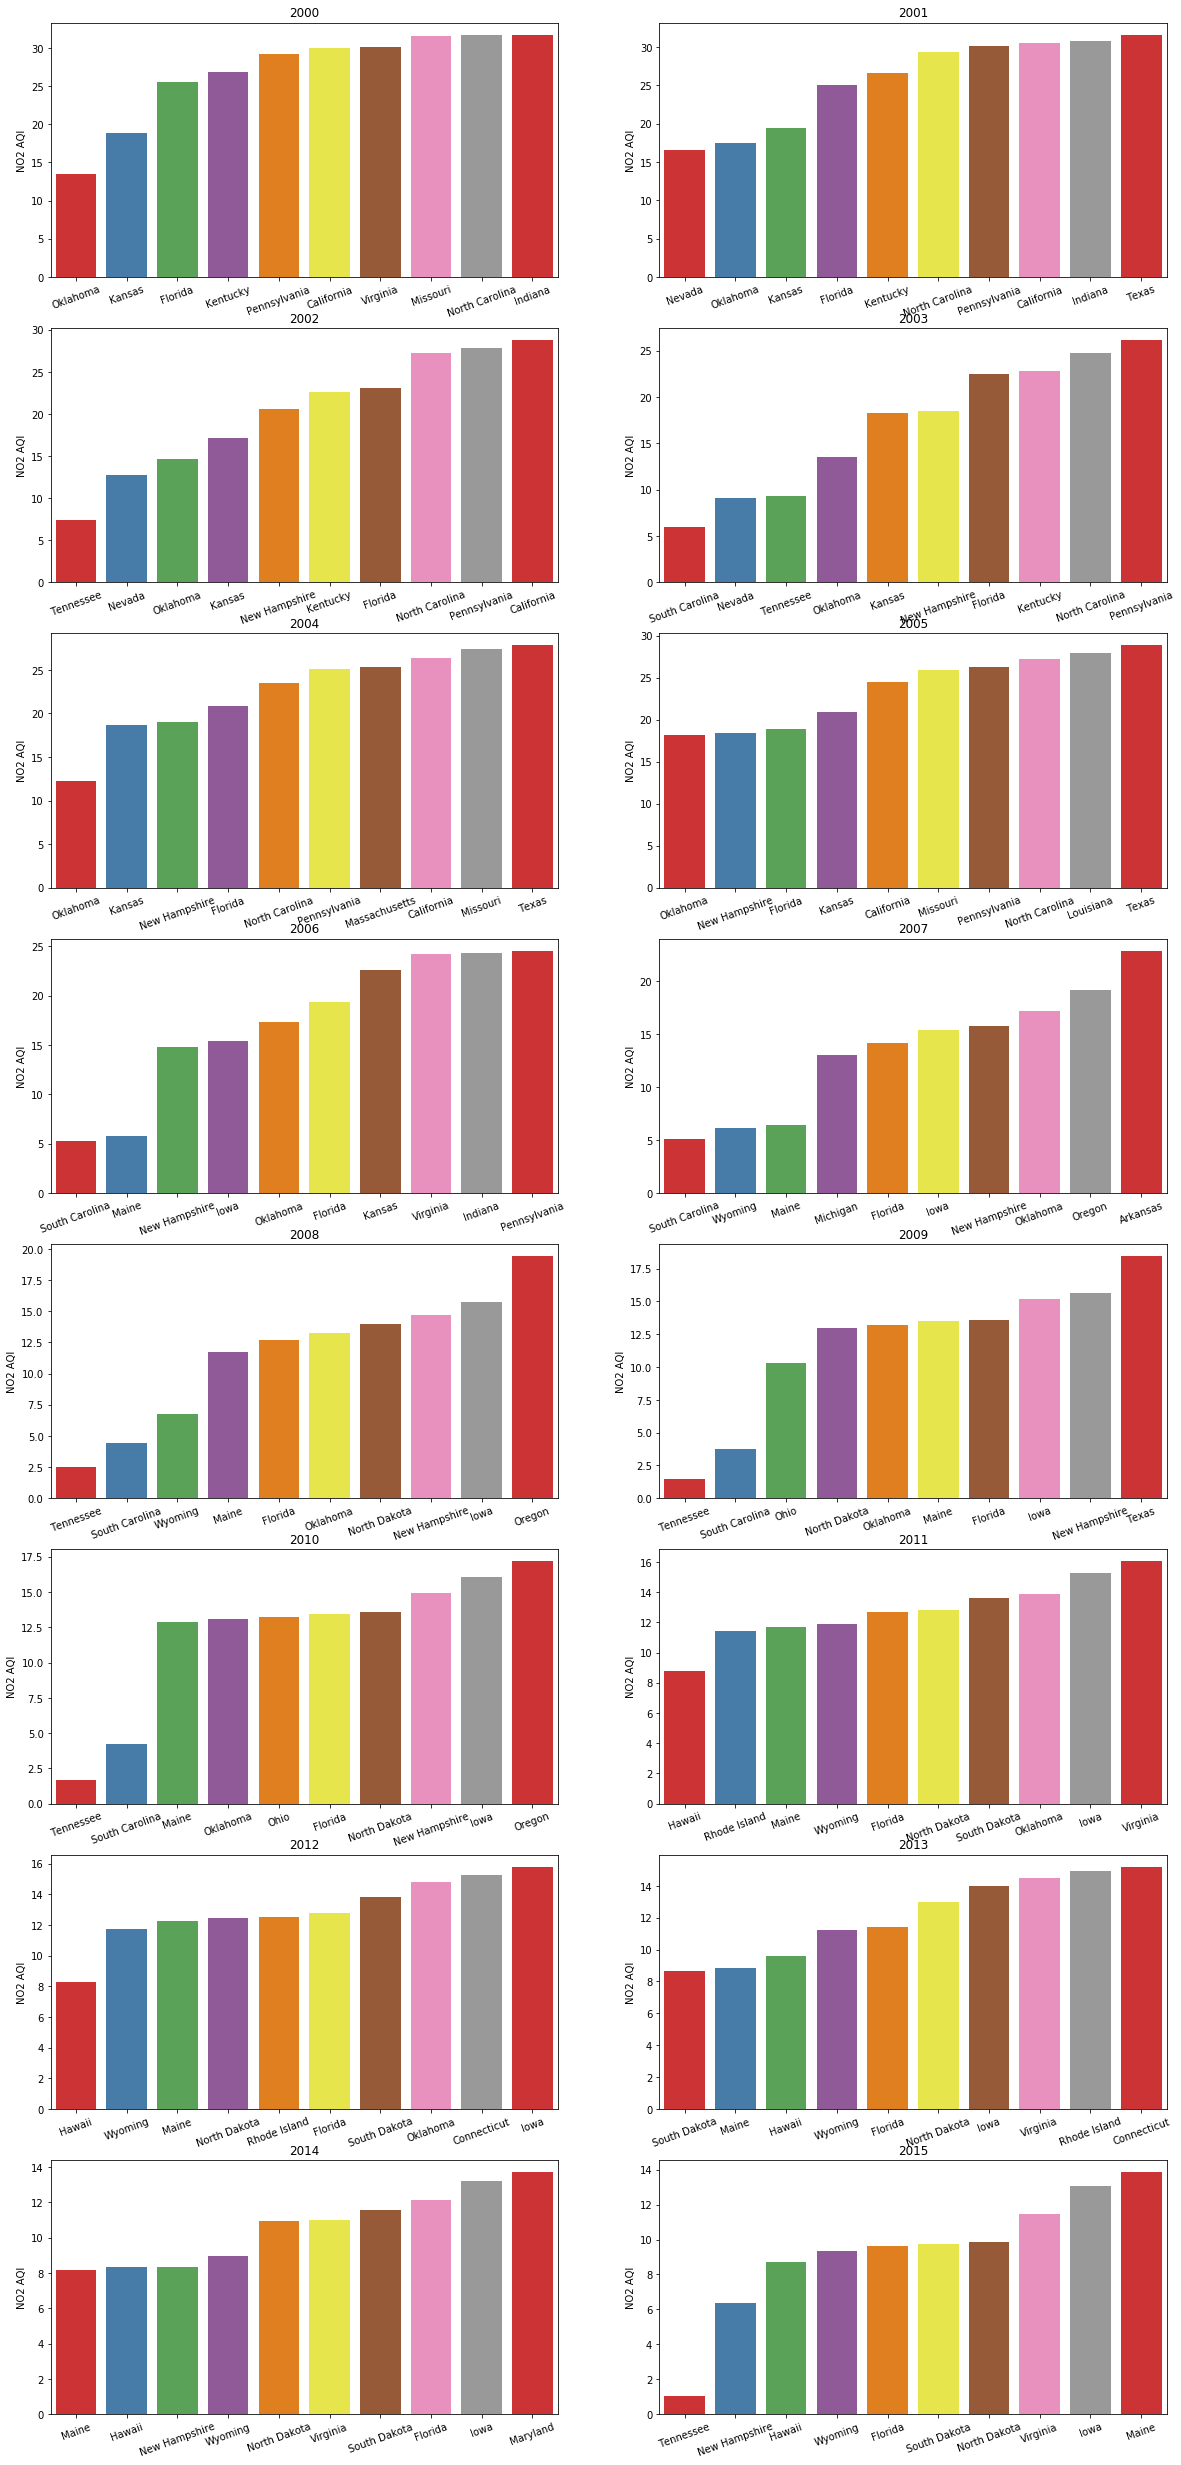

In [43]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(8,2, figsize=(20,44))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[0,0])
axes[0,0].set_title("2000")
axes[0,0].set_xlabel("")
axes[0,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[0,1])
axes[0,1].set_title("2001")
axes[0,1].set_xlabel("")
axes[0,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[1,0])
axes[1,0].set_title("2002")
axes[1,0].set_xlabel("")
axes[1,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[1,1])
axes[1,1].set_title("2003")
axes[1,1].set_xlabel("")
axes[1,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[2,0])
axes[2,0].set_title("2004")
axes[2,0].set_xlabel("")
axes[2,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[2,1])
axes[2,1].set_title("2005")
axes[2,1].set_xlabel("")
axes[2,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[3,0])
axes[3,0].set_title("2006")
axes[3,0].set_xlabel("")
axes[3,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[3,1])
axes[3,1].set_title("2007")
axes[3,1].set_xlabel("")
axes[3,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[4,0])
axes[4,0].set_title("2008")
axes[4,0].set_xlabel("")
axes[4,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[4,1])
axes[4,1].set_title("2009")
axes[4,1].set_xlabel("")
axes[4,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[5,0])
axes[5,0].set_title("2010")
axes[5,0].set_xlabel("")
axes[5,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[5,1])
axes[5,1].set_title("2011")
axes[5,1].set_xlabel("")
axes[5,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[6,0])
axes[6,0].set_title("2012")
axes[6,0].set_xlabel("")
axes[6,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[6,1])
axes[6,1].set_title("2013")
axes[6,1].set_xlabel("")
axes[6,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[7,0])
axes[7,0].set_title("2014")
axes[7,0].set_xlabel("")
axes[7,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['NO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','NO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['NO2 AQI'],palette="Set1",ax=axes[7,1])
axes[7,1].set_title("2015")
axes[7,1].set_xlabel("")
axes[7,1].tick_params(axis='x',labelrotation=20)

# For O3

Text(0.5,1,'2015')

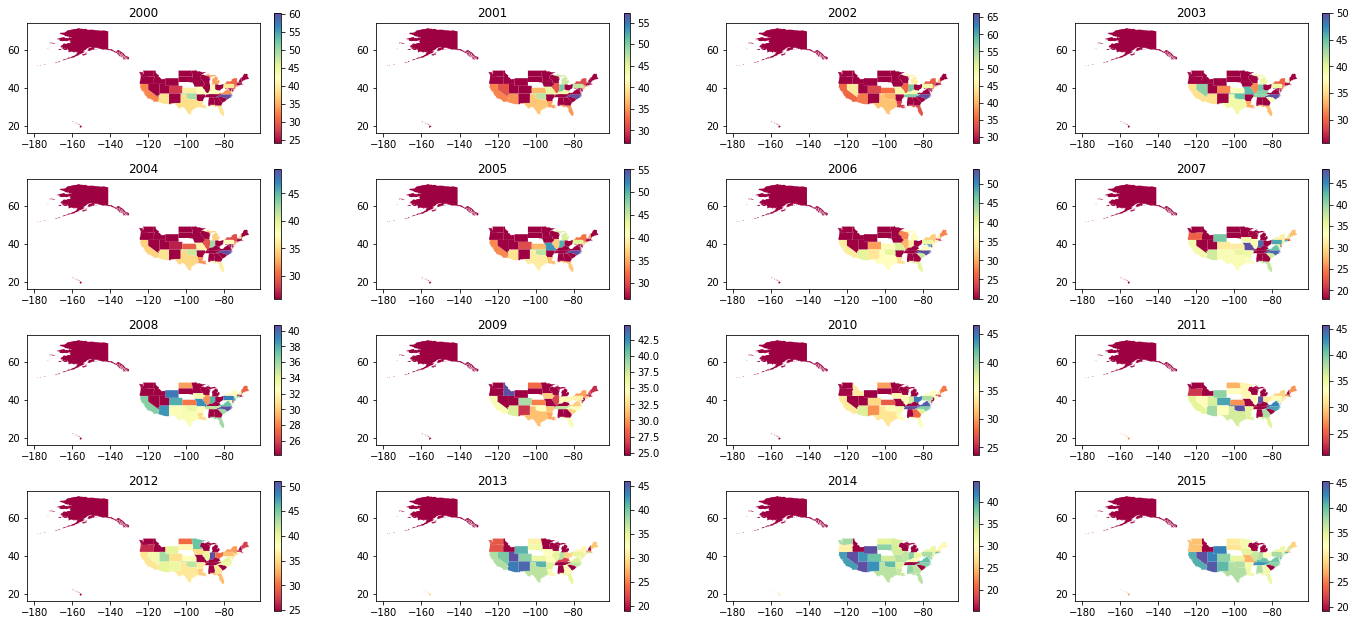

In [44]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,4, figsize=(24,11))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,0])
axes[0,0].set_title("2000")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,1])
axes[0,1].set_title("2001")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,2])
axes[0,2].set_title("2002")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,3])
axes[0,3].set_title("2003")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,0])
axes[1,0].set_title("2004")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,1])
axes[1,1].set_title("2005")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,2])
axes[1,2].set_title("2006")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,3])
axes[1,3].set_title("2007")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,0])
axes[2,0].set_title("2008")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,1])
axes[2,1].set_title("2009")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,2])
axes[2,2].set_title("2010")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,3])
axes[2,3].set_title("2011")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,0])
axes[3,0].set_title("2012")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,1])
axes[3,1].set_title("2013")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,2])
axes[3,2].set_title("2014")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','O3 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['O3 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,3])
axes[3,3].set_title("2015")

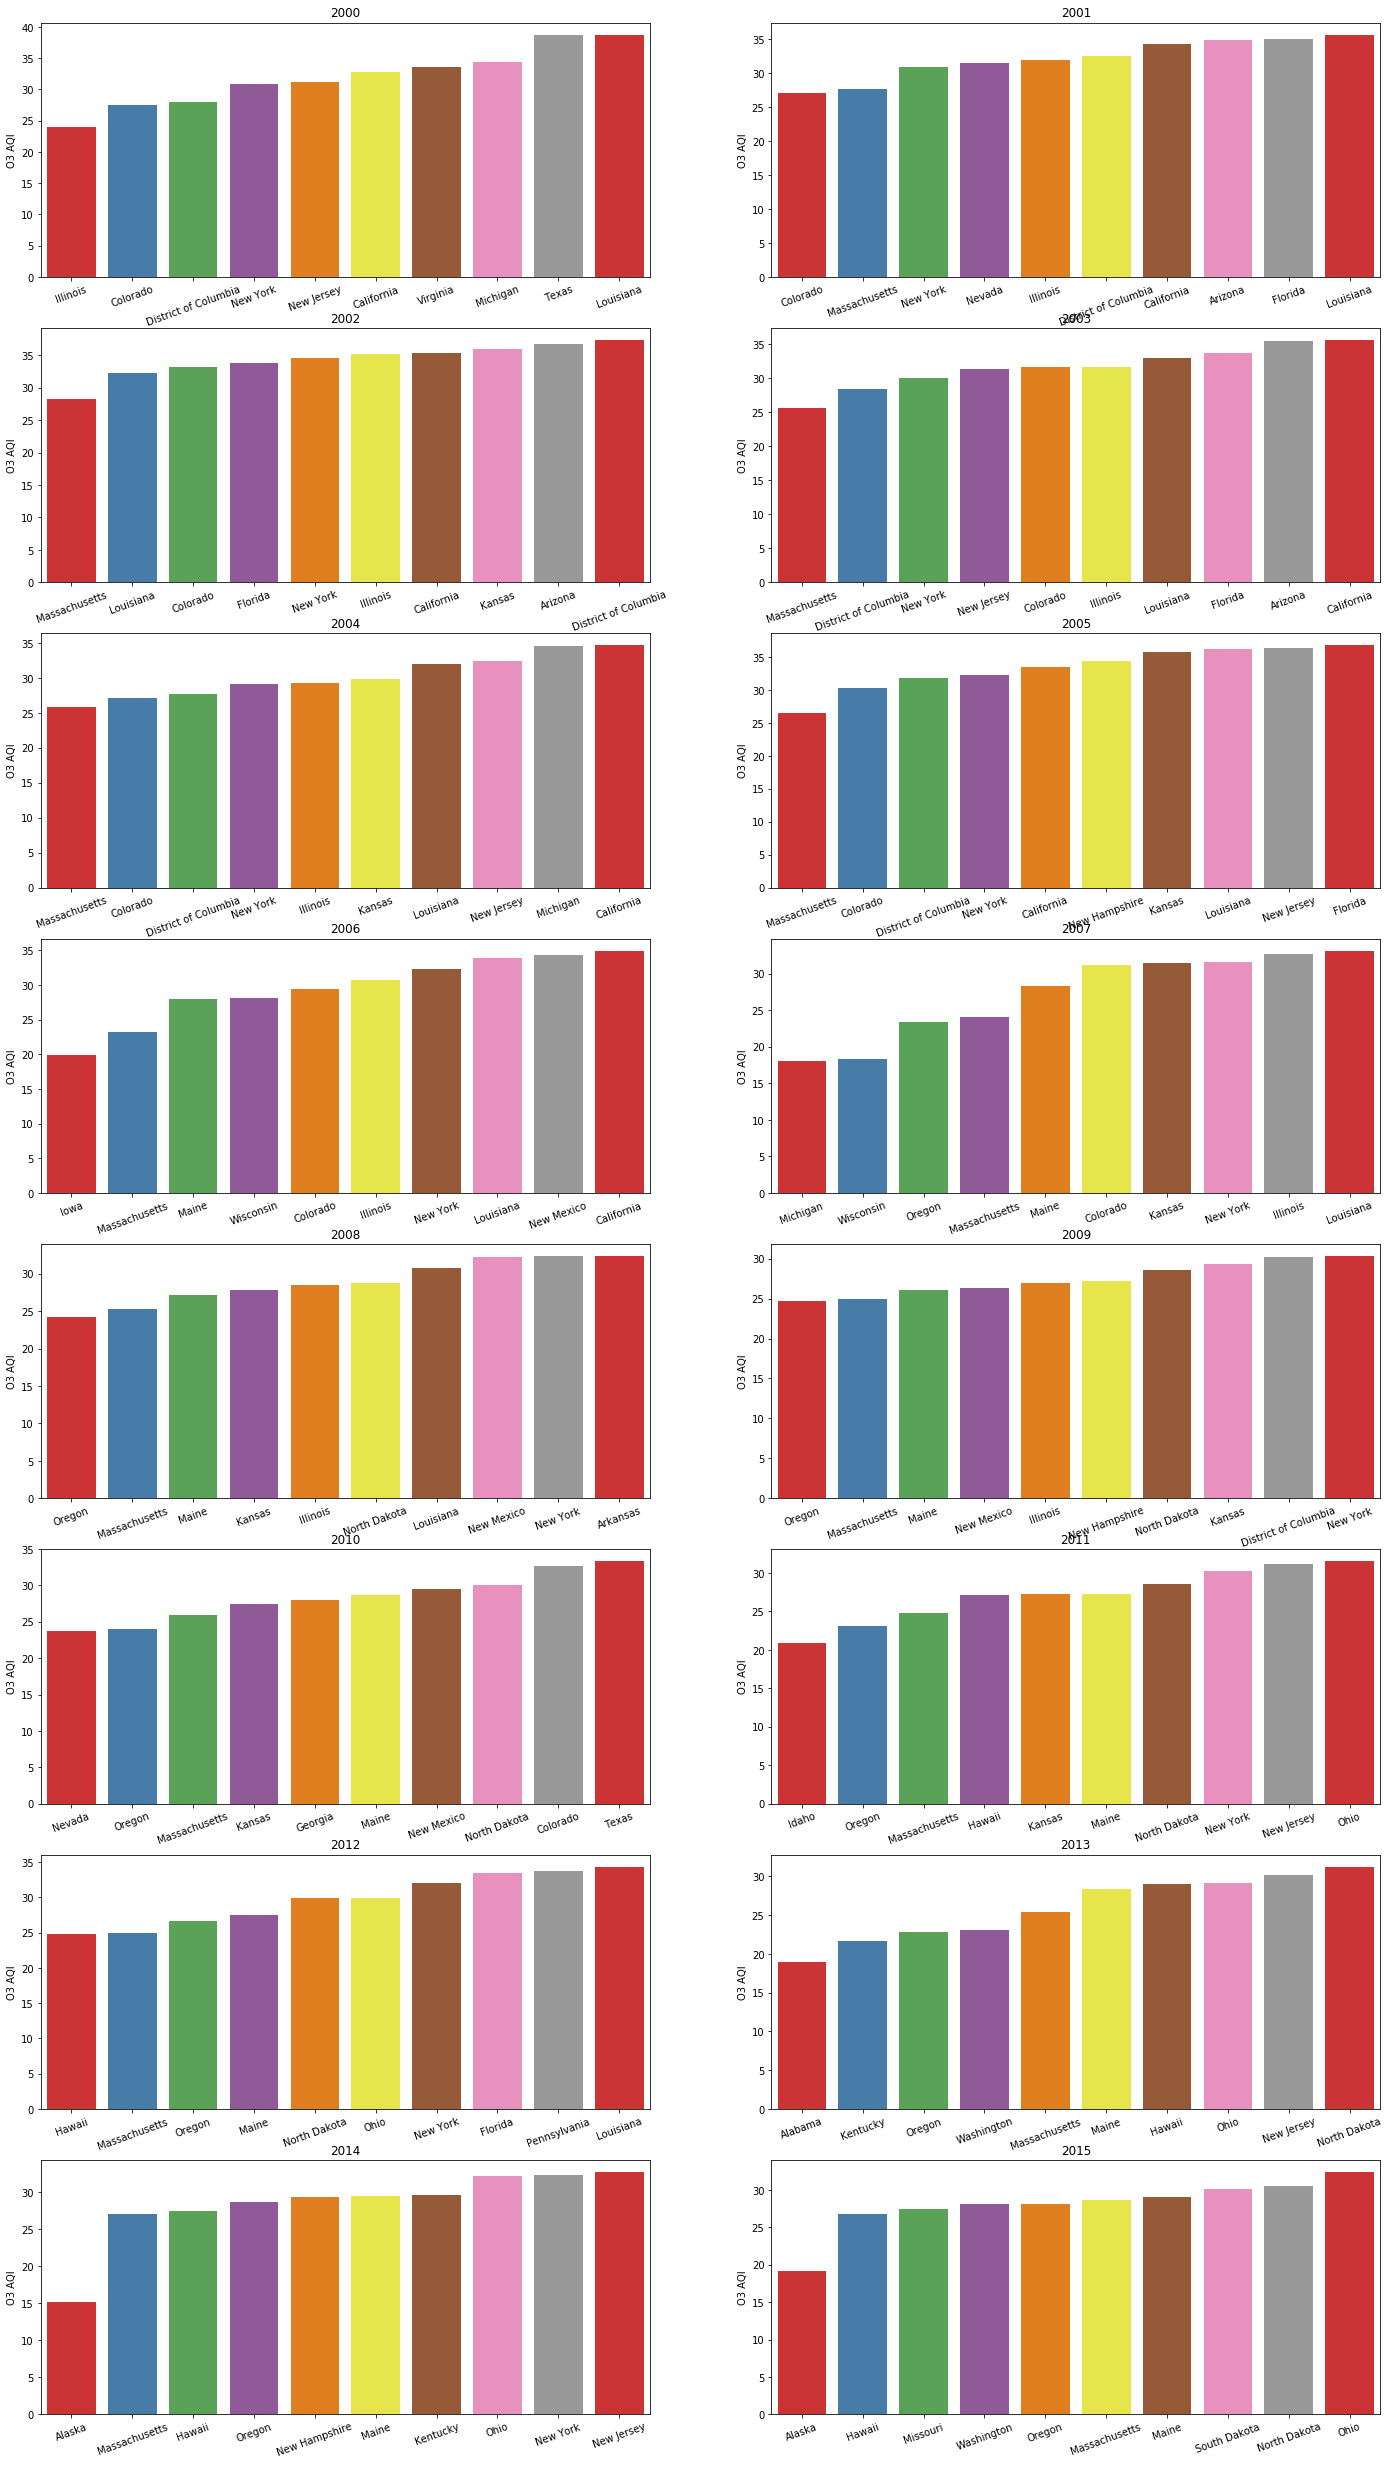

In [45]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(8,2, figsize=(24,44))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[0,0])
axes[0,0].set_title("2000")
axes[0,0].set_xlabel("")
axes[0,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[0,1])
axes[0,1].set_title("2001")
axes[0,1].set_xlabel("")
axes[0,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[1,0])
axes[1,0].set_title("2002")
axes[1,0].set_xlabel("")
axes[1,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[1,1])
axes[1,1].set_title("2003")
axes[1,1].set_xlabel("")
axes[1,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[2,0])
axes[2,0].set_title("2004")
axes[2,0].set_xlabel("")
axes[2,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[2,1])
axes[2,1].set_title("2005")
axes[2,1].set_xlabel("")
axes[2,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[3,0])
axes[3,0].set_title("2006")
axes[3,0].set_xlabel("")
axes[3,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[3,1])
axes[3,1].set_title("2007")
axes[3,1].set_xlabel("")
axes[3,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[4,0])
axes[4,0].set_title("2008")
axes[4,0].set_xlabel("")
axes[4,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[4,1])
axes[4,1].set_title("2009")
axes[4,1].set_xlabel("")
axes[4,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[5,0])
axes[5,0].set_title("2010")
axes[5,0].set_xlabel("")
axes[5,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[5,1])
axes[5,1].set_title("2011")
axes[5,1].set_xlabel("")
axes[5,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[6,0])
axes[6,0].set_title("2012")
axes[6,0].set_xlabel("")
axes[6,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[6,1])
axes[6,1].set_title("2013")
axes[6,1].set_xlabel("")
axes[6,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[7,0])
axes[7,0].set_title("2014")
axes[7,0].set_xlabel("")
axes[7,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['O3 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','O3 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['O3 AQI'],palette="Set1",ax=axes[7,1])
axes[7,1].set_title("2015")
axes[7,1].set_xlabel("")
axes[7,1].tick_params(axis='x',labelrotation=20)

# For SO2

Text(0.5,1,'2015')

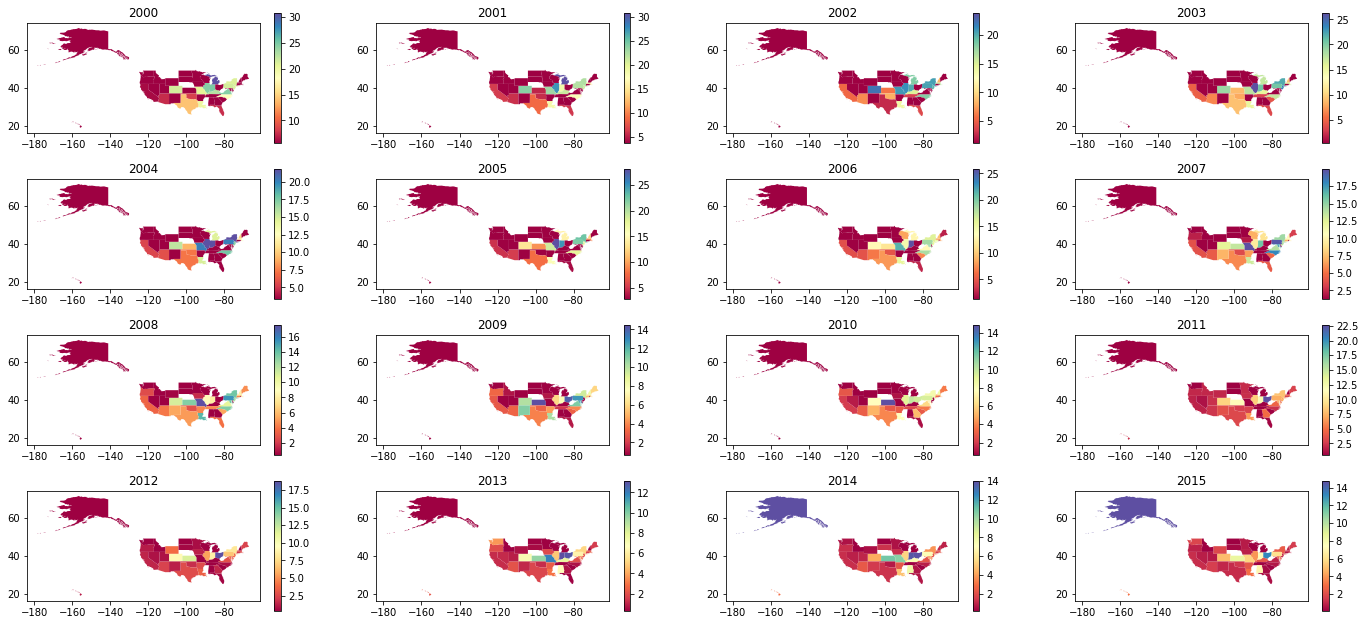

In [46]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,4, figsize=(24,11))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,0])
axes[0,0].set_title("2000")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,1])
axes[0,1].set_title("2001")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,2])
axes[0,2].set_title("2002")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,3])
axes[0,3].set_title("2003")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,0])
axes[1,0].set_title("2004")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,1])
axes[1,1].set_title("2005")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,2])
axes[1,2].set_title("2006")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,3])
axes[1,3].set_title("2007")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,0])
axes[2,0].set_title("2008")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,1])
axes[2,1].set_title("2009")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,2])
axes[2,2].set_title("2010")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,3])
axes[2,3].set_title("2011")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,0])
axes[3,0].set_title("2012")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,1])
axes[3,1].set_title("2013")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,2])
axes[3,2].set_title("2014")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','SO2 AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['SO2 AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,3])
axes[3,3].set_title("2015")

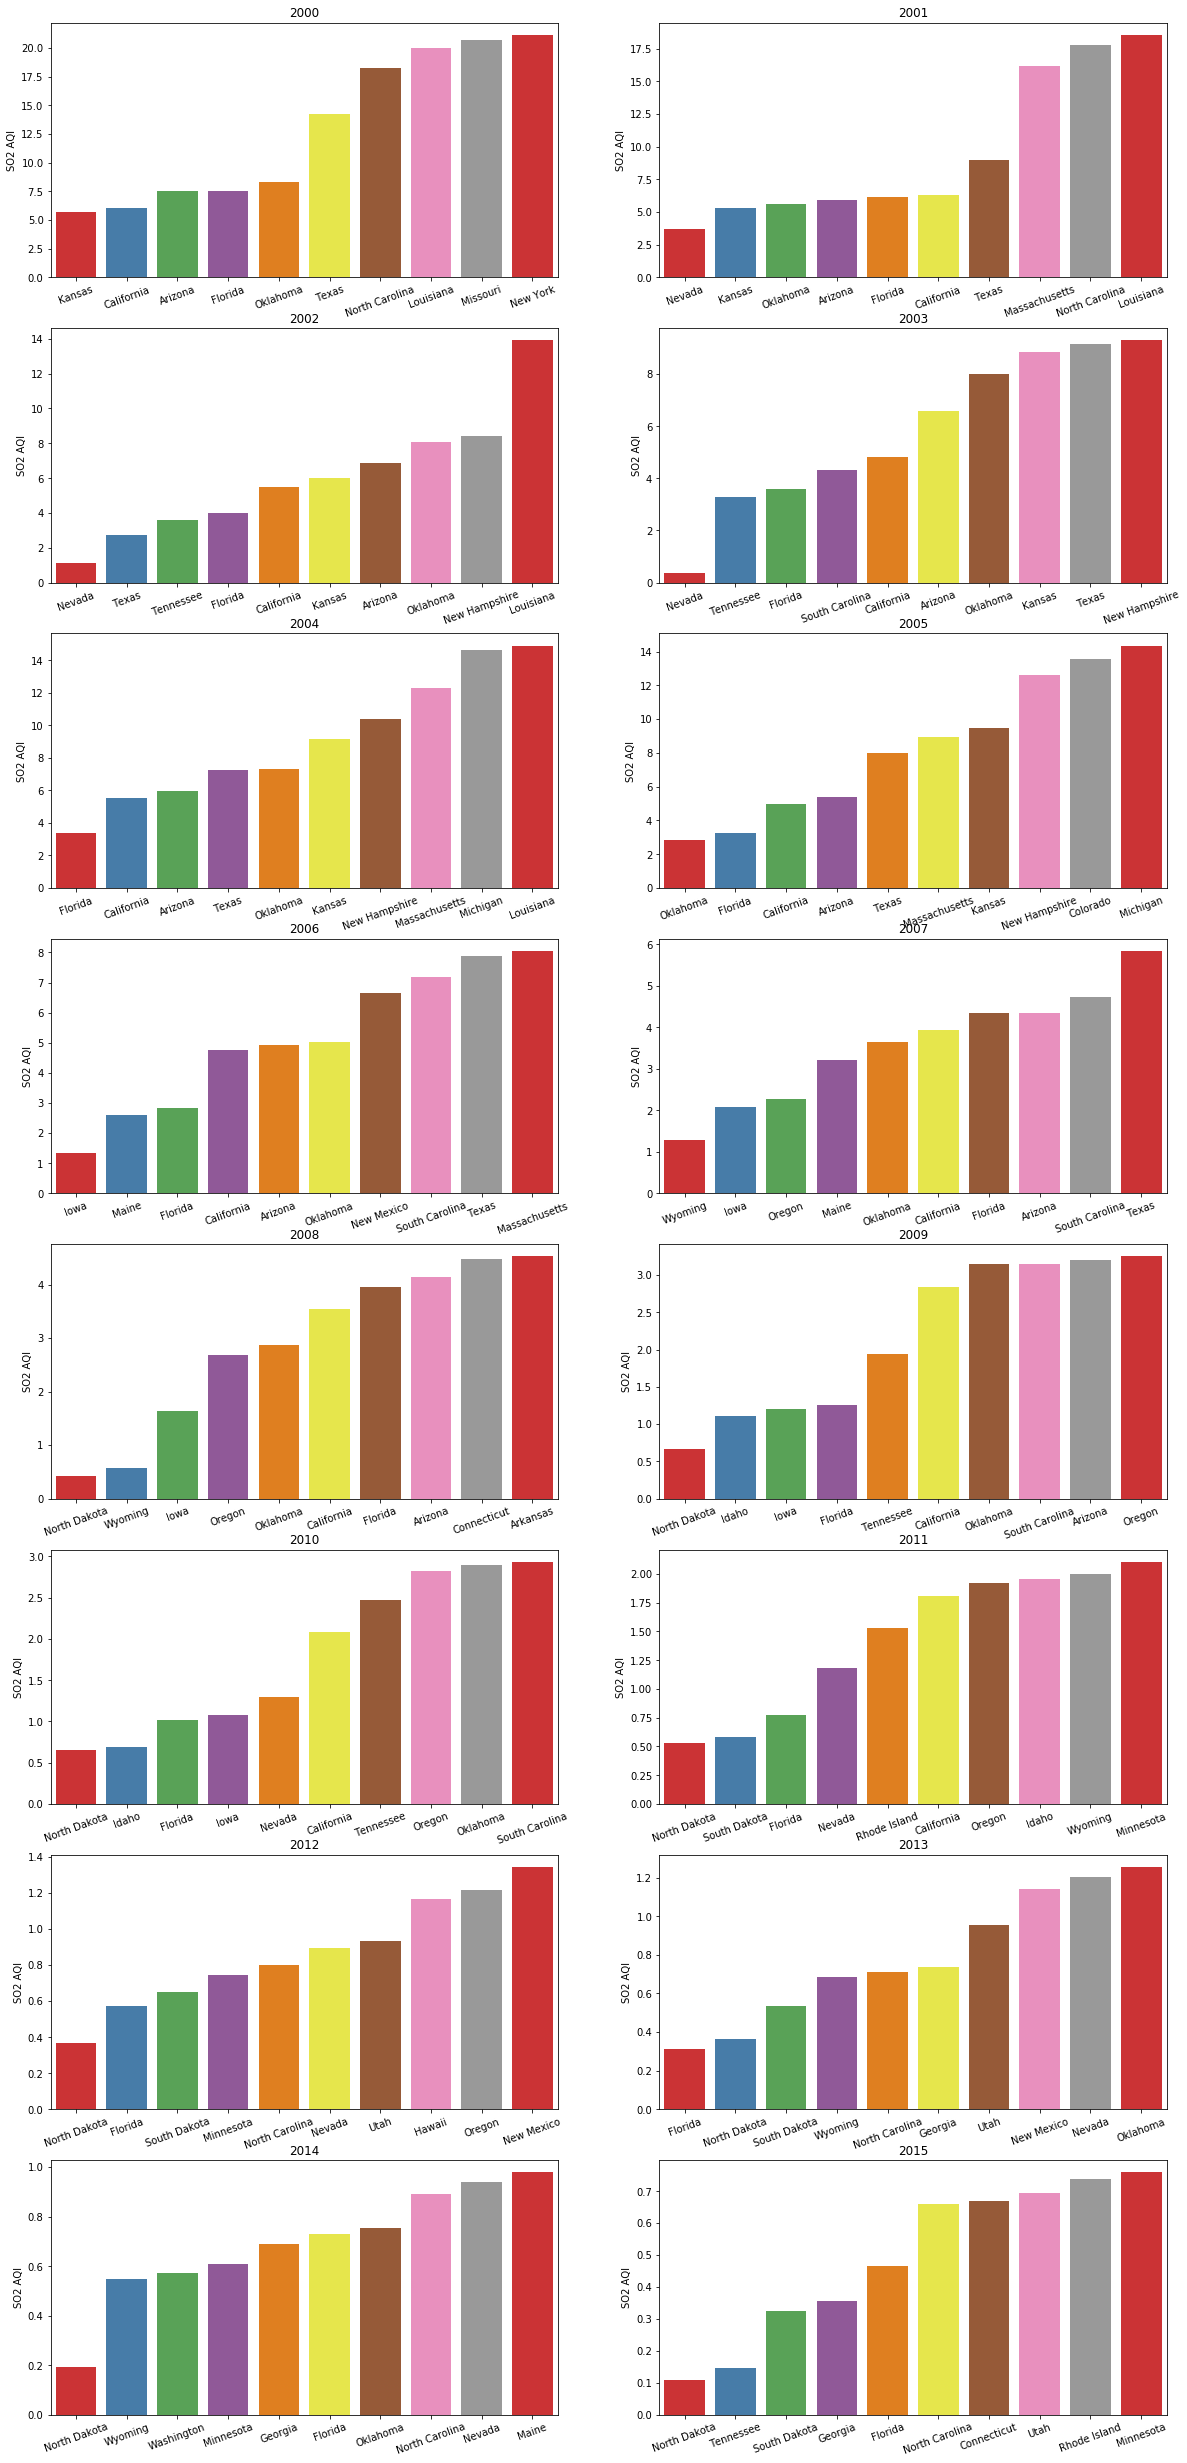

In [47]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(8,2, figsize=(20,44))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[0,0])
axes[0,0].set_title("2000")
axes[0,0].set_xlabel("")
axes[0,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[0,1])
axes[0,1].set_title("2001")
axes[0,1].set_xlabel("")
axes[0,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[1,0])
axes[1,0].set_title("2002")
axes[1,0].set_xlabel("")
axes[1,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[1,1])
axes[1,1].set_title("2003")
axes[1,1].set_xlabel("")
axes[1,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[2,0])
axes[2,0].set_title("2004")
axes[2,0].set_xlabel("")
axes[2,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[2,1])
axes[2,1].set_title("2005")
axes[2,1].set_xlabel("")
axes[2,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[3,0])
axes[3,0].set_title("2006")
axes[3,0].set_xlabel("")
axes[3,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[3,1])
axes[3,1].set_title("2007")
axes[3,1].set_xlabel("")
axes[3,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[4,0])
axes[4,0].set_title("2008")
axes[4,0].set_xlabel("")
axes[4,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[4,1])
axes[4,1].set_title("2009")
axes[4,1].set_xlabel("")
axes[4,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[5,0])
axes[5,0].set_title("2010")
axes[5,0].set_xlabel("")
axes[5,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[5,1])
axes[5,1].set_title("2011")
axes[5,1].set_xlabel("")
axes[5,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[6,0])
axes[6,0].set_title("2012")
axes[6,0].set_xlabel("")
axes[6,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[6,1])
axes[6,1].set_title("2013")
axes[6,1].set_xlabel("")
axes[6,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[7,0])
axes[7,0].set_title("2014")
axes[7,0].set_xlabel("")
axes[7,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['SO2 AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','SO2 AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['SO2 AQI'],palette="Set1",ax=axes[7,1])
axes[7,1].set_title("2015")
axes[7,1].set_xlabel("")
axes[7,1].tick_params(axis='x',labelrotation=20)

# For CO

Text(0.5,1,'2015')

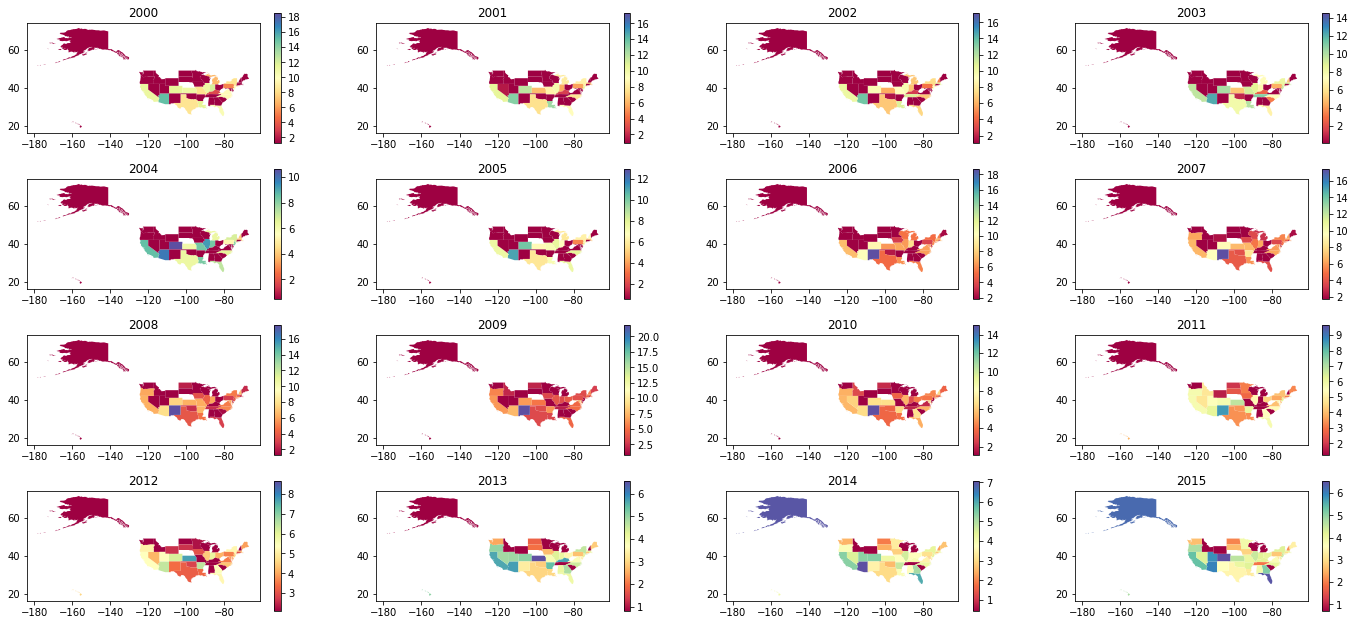

In [48]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(4,4, figsize=(24,11))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,0])
axes[0,0].set_title("2000")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,1])
axes[0,1].set_title("2001")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,2])
axes[0,2].set_title("2002")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[0,3])
axes[0,3].set_title("2003")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,0])
axes[1,0].set_title("2004")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,1])
axes[1,1].set_title("2005")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,2])
axes[1,2].set_title("2006")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[1,3])
axes[1,3].set_title("2007")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,0])
axes[2,0].set_title("2008")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,1])
axes[2,1].set_title("2009")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,2])
axes[2,2].set_title("2010")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[2,3])
axes[2,3].set_title("2011")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,0])
axes[3,0].set_title("2012")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,1])
axes[3,1].set_title("2013")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,2])
axes[3,2].set_title("2014")
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))
geo_no2_aqi = pd.DataFrame(l3,columns=['State','CO AQI'])

df_geo = pd.merge(left=geo_no2_aqi,right=shape_file,how='inner',right_on='STATE_NAME',left_on='State')
df_geo.drop(columns=['STATE_NAME'],axis=1,inplace=True)
df_geo = gpd.GeoDataFrame(df_geo)

df_geo.plot(column=df_geo['CO AQI'],cmap=plt.cm.get_cmap('Spectral'),legend=True,figsize=(20,5),ax=axes[3,3])
axes[3,3].set_title("2015")

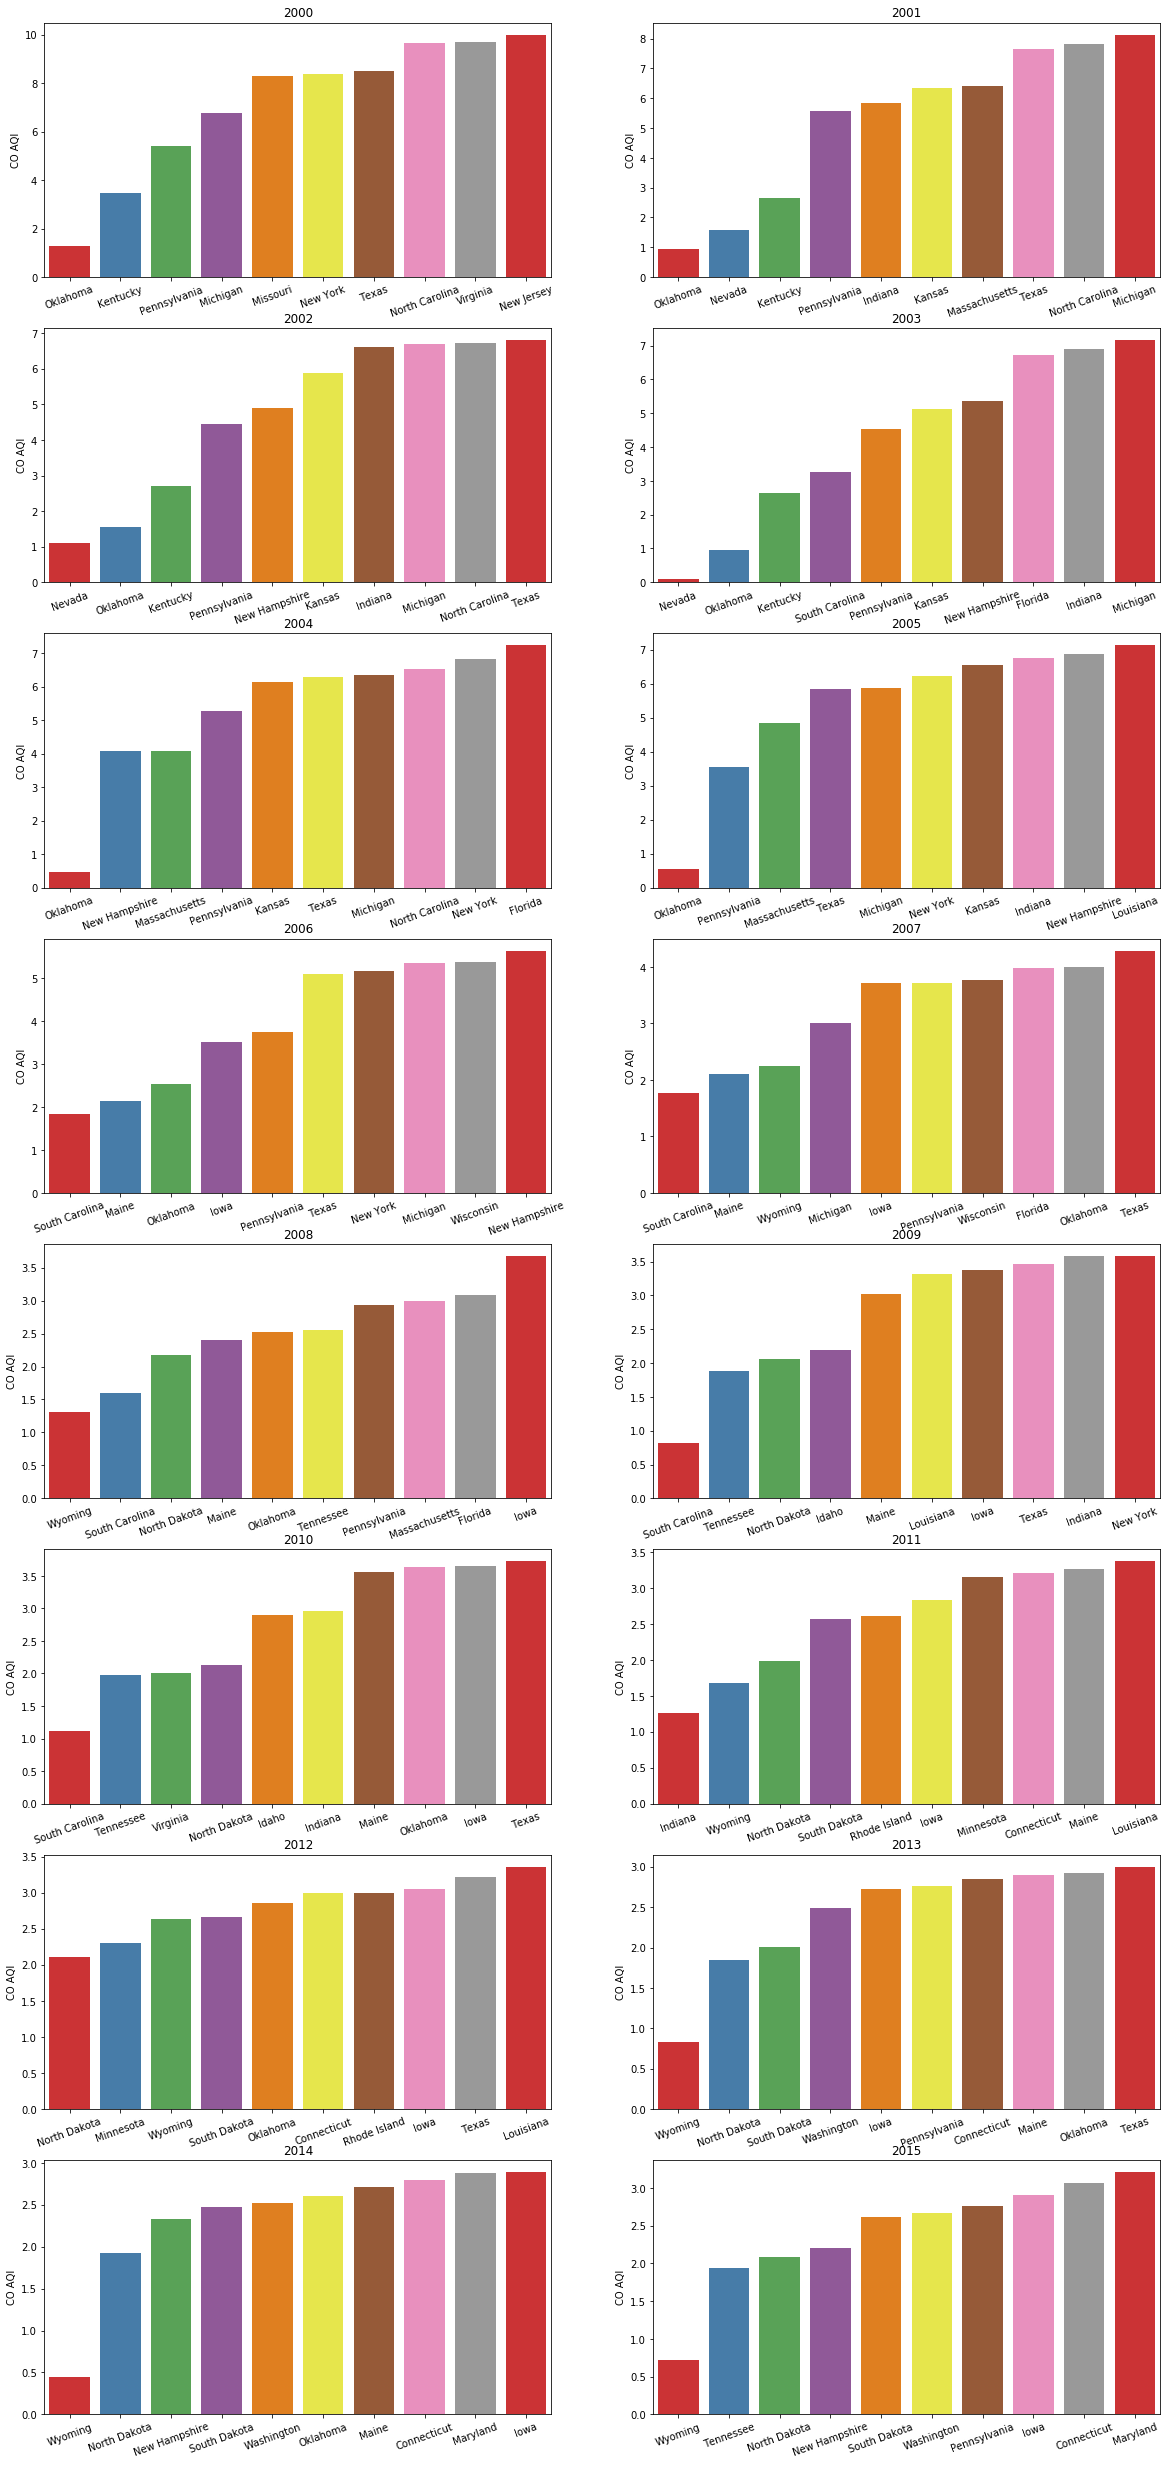

In [49]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(8,2, figsize=(20,44))
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2000)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[0,0])
axes[0,0].set_title("2000")
axes[0,0].set_xlabel("")
axes[0,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2001)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[0,1])
axes[0,1].set_title("2001")
axes[0,1].set_xlabel("")
axes[0,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2002)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[1,0])
axes[1,0].set_title("2002")
axes[1,0].set_xlabel("")
axes[1,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2003)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[1,1])
axes[1,1].set_title("2003")
axes[1,1].set_xlabel("")
axes[1,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2004)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[2,0])
axes[2,0].set_title("2004")
axes[2,0].set_xlabel("")
axes[2,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2005)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[2,1])
axes[2,1].set_title("2005")
axes[2,1].set_xlabel("")
axes[2,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2006)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[3,0])
axes[3,0].set_title("2006")
axes[3,0].set_xlabel("")
axes[3,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2007)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[3,1])
axes[3,1].set_title("2007")
axes[3,1].set_xlabel("")
axes[3,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2008)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[4,0])
axes[4,0].set_title("2008")
axes[4,0].set_xlabel("")
axes[4,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2009)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[4,1])
axes[4,1].set_title("2009")
axes[4,1].set_xlabel("")
axes[4,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2010)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[5,0])
axes[5,0].set_title("2010")
axes[5,0].set_xlabel("")
axes[5,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2011)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[5,1])
axes[5,1].set_title("2011")
axes[5,1].set_xlabel("")
axes[5,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2012)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[6,0])
axes[6,0].set_title("2012")
axes[6,0].set_xlabel("")
axes[6,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2013)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[6,1])
axes[6,1].set_title("2013")
axes[6,1].set_xlabel("")
axes[6,1].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2014)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[7,0])
axes[7,0].set_title("2014")
axes[7,0].set_xlabel("")
axes[7,0].tick_params(axis='x',labelrotation=20)
#---------------------------------------------------------------------------------------------------------------------------
l1 = df['State'].unique()
l2 = []
for i in l1:
    x = df[(df['State']==i) & (df['Year']==2015)]['CO AQI'].mean()
    l2.append(x)
l3 = list(zip(l1,l2))

lx = sorted(l3,key=operator.itemgetter(1))
lx = lx[:10]
temp_df = pd.DataFrame(lx,columns=['State','CO AQI'])
graph = sns.barplot(x=temp_df['State'],y=temp_df['CO AQI'],palette="Set1",ax=axes[7,1])
axes[7,1].set_title("2015")
axes[7,1].set_xlabel("")
axes[7,1].tick_params(axis='x',labelrotation=20)